In [1]:
from cmath import nan
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches
from helpers_DF import *
import time

In [3]:
softening=1e-6
k=8.9875517923*1e9

info = np.loadtxt('E_field/info.txt')
convert_dist=info[1] 
convert_E=info[2]
convert_vel=info[3]

prob = np.loadtxt('E_field/prob.txt')
ri = np.loadtxt('E_field/r.txt')*convert_dist  # r initial condition
zi = np.loadtxt('E_field/z.txt')*convert_dist  # z initial condition
vri = np.loadtxt('E_field/v_r.txt')*convert_vel # vr initial condition
vzi = np.loadtxt('E_field/v_z.txt')*convert_vel # vz initial condition

# Load the csv file
df = pd.read_csv('E_field/Fields.csv')
# Convert the DataFrame to a numpy array
Field = df.values
r=Field[:,0]*convert_dist
z=Field[:,1]*convert_dist
Er=Field[:,2]*convert_E
Ez=Field[:,3]*convert_E

interp=triangulation (r,z,Er,Ez)




In [4]:
dt=5e-12
Pneut=0
Pmono=40
Pdim=40
Ptrim=20

In [7]:
N_values = list(range(100, 1001, 100)) + list(range(2000, 10001, 1000))+ list(range(20000, 30001, 10000))
times = []
N_FMM = []
print(N_values)

[100, 200, 300, 400, 500, 600, 700, 800, 900, 1000, 2000, 3000, 4000, 5000, 6000, 7000, 8000, 9000, 10000, 20000, 30000]


In [8]:
for N in N_values:
    start_time = time.time()
    species, pos_save, IC = DF_nbody(dt, N, prob, ri, zi, vri, vzi, Pneut, Pmono, Pdim, Ptrim, softening, k, interp)
    end_time = time.time()
    elapsed_time = end_time - start_time
    times.append(elapsed_time)
    print(f"Elapsed time for N={N}: {elapsed_time} seconds")
    
    zz = pos_save[:,2,-1]*1e6
    N_poisson=np.sum(zz<5)*10 +np.sum((zz > 5) & (zz <= 250))/10
    N_FMM.append(N_poisson)



Elapsed time for N=100: 1.0857012271881104 seconds
Elapsed time for N=200: 0.13967585563659668 seconds
Elapsed time for N=300: 0.08417010307312012 seconds
Elapsed time for N=400: 0.12854981422424316 seconds
Elapsed time for N=500: 0.17714166641235352 seconds
Elapsed time for N=600: 0.24022960662841797 seconds
Elapsed time for N=700: 0.31253719329833984 seconds
Elapsed time for N=800: 0.38007569313049316 seconds
Elapsed time for N=900: 0.453014612197876 seconds
Elapsed time for N=1000: 0.5490949153900146 seconds
Elapsed time for N=2000: 2.204141139984131 seconds
Elapsed time for N=3000: 3.310857057571411 seconds
Elapsed time for N=4000: 5.05904221534729 seconds
Elapsed time for N=5000: 7.665600299835205 seconds
Elapsed time for N=6000: 7.967484951019287 seconds
Elapsed time for N=7000: 9.899994373321533 seconds
Elapsed time for N=8000: 11.531324625015259 seconds
Elapsed time for N=9000: 13.537962675094604 seconds
Elapsed time for N=10000: 15.532580614089966 seconds
Elapsed time for N=20

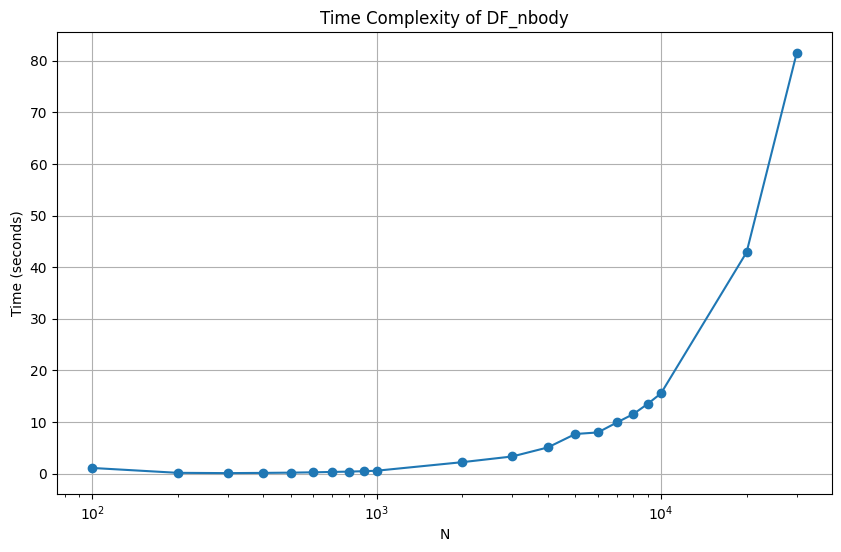

In [9]:
plt.figure(figsize=(10, 6))
plt.plot(N_values, times, marker='o')
plt.xlabel('N')
plt.ylabel('Time (seconds)')
plt.title('Time Complexity of DF_nbody')
plt.grid(True)
plt.xscale('log')
plt.show()

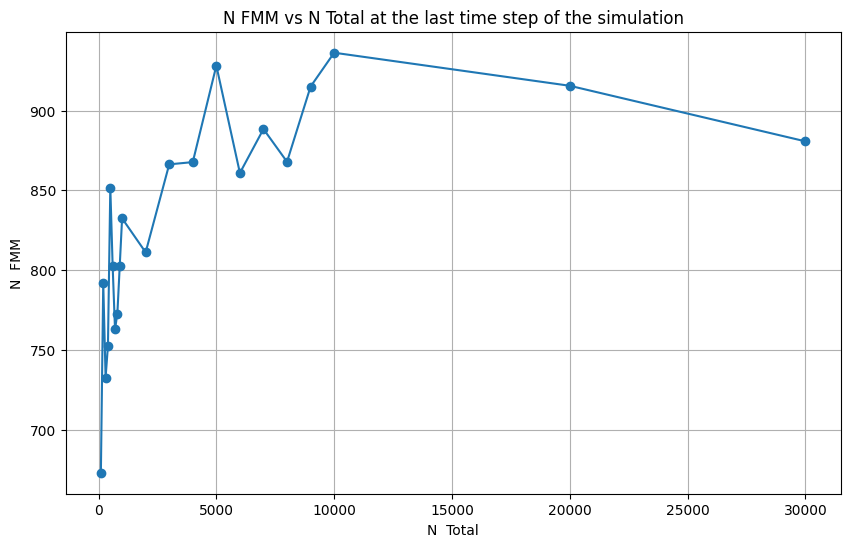

In [10]:
plt.figure(figsize=(10, 6))
plt.plot(N_values, N_FMM, marker='o')
plt.xlabel('N  Total')
plt.ylabel('N  FMM')
plt.title('N FMM vs N Total at the last time step of the simulation')
plt.grid(True)
plt.show()

In [65]:
N_FMM

[673.2,
 792.1,
 732.8,
 752.7,
 851.8,
 802.4,
 762.9,
 772.9,
 802.7,
 832.5,
 811.2,
 866.3,
 867.7,
 928.1,
 860.9,
 888.4,
 867.9,
 915.0,
 936.2,
 915.5]